# Local Postgresql Database Lab

In this lab we will practice adding and removing data from a local Postgresql database. We will:

- Walk through instructions on how to set up and configure a local postgresql server
- Create a database and a table using SQL and CRUD data in/from that table.
- Learn how to copy data from a CSV file into this local database
- Practice our SQL with a practice assignment.

## 1. Install PostgreSQL Locally

You should have already taken care of this in the Installfest, but just in case, [here](http://www.postgresql.org/download/) are the instructions for the most common platforms.

## 2. Launch and connect to a local PostgreSQL server

Now that you've installed PostgreSQL locally, practice connecting with the following methods:

- [Postico](https://eggerapps.at/postico/docs/v1.0.6/)
- Command-line (psql)
- Sqlalchemy + Pandas
- Ipython-notebook using the ipython-sql extension

**Check:** List the existing databases, there should be none, right?
> not true, there are some default databases from postgres

**Check:** If there are databases, check the tables' contents.

In [8]:
#- from sqlalchemy
from sqlalchemy import create_engine
import pandas as pd
engine = create_engine('postgresql://localhost:5432')
pd.read_sql("SELECT * FROM information_schema.tables LIMIT 3;", engine)

,table_catalog,table_schema,table_name,table_type,self_referencing_column_name,reference_generation,user_defined_type_catalog,user_defined_type_schema,user_defined_type_name,is_insertable_into,is_typed,commit_action
0,francescomosconi,pg_catalog,pg_statistic,BASE TABLE,None,None,None,None,None,YES,NO,None
1,francescomosconi,pg_catalog,pg_type,BASE TABLE,None,None,None,None,None,YES,NO,None
2,francescomosconi,pg_catalog,pg_authid,BASE TABLE,None,None,None,None,None,YES,NO,None


In [9]:
# - the ipython-notebook using the ipython-sql extension
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [10]:
%%sql postgresql://localhost:5432

SELECT * FROM information_schema.tables LIMIT 3;

3 rows affected.


table_catalog,table_schema,table_name,table_type,self_referencing_column_name,reference_generation,user_defined_type_catalog,user_defined_type_schema,user_defined_type_name,is_insertable_into,is_typed,commit_action
francescomosconi,pg_catalog,pg_statistic,BASE TABLE,None,None,None,None,None,YES,NO,None
francescomosconi,pg_catalog,pg_type,BASE TABLE,None,None,None,None,None,YES,NO,None
francescomosconi,pg_catalog,pg_authid,BASE TABLE,None,None,None,None,None,YES,NO,None


## 3. Create DB
Once you are connected to your local Postgresql server, create a new database. Call it `lab33`.

Practice creating and deleting the database with the following methods:

- Postico
- Command-line:
>     create database lab33
>     drop database lab33

- Sqlalchemy
- Ipython-notebook using the ipython-sql extension

**Check:** If you create a DB in Postico, do you see it from the command-line?
> Yes

**Check:** What does this tell us about multiple connections to the same db?
> Multiple users/connections are possible and the data is consistent. Postgres is relational -> ACID.

In [12]:
# sqlalchemy
conn = engine.connect()
conn.execute("commit")
conn.execute("create database lab33")
conn.close()

In [13]:
%%sql
create database lab33
# drop database lab33

Done.


[]

## 4. CRUD (Create, Read, Update, and Delete)

In lesson 1.1 you learned how to add and remove data from sqlite. Let's review that on our local PostgreSQL installation.

### 4.a: Creating Tables and Adding Columns

1. Create an table called `table1` with a single column `field1` containing an INTEGER PRIMARY KEY. Practice doing this with any of the methods above.
- Add a few more columns to `table1`:
    - field2 VARCHAR(16)
    - field3 REAL
    - field4 TEXT
check [the doc](http://www.postgresql.org/docs/9.3/static/datatype.html) for more info on data types supported by postgresql.
- Check tables and schemas using command line or postico

In [14]:
%%sql postgresql://localhost:5432/lab33

CREATE TABLE table1 (field1 INTEGER PRIMARY KEY);

Done.


[]

In [16]:
%%sql
ALTER TABLE table1 ADD COLUMN field2 VARCHAR(16);
ALTER TABLE table1 ADD COLUMN field3 REAL;
ALTER TABLE table1 ADD COLUMN field4 TEXT;

Done.
Done.
Done.


[]

### 4.b: Add Data

Add some data to `table1`:

|field1|field2|field3|field4|
|----|
|1|'Henry James'|42|'75 Mission Street, San Francisco, CA'|
|2|'Carol James'|40|'75 Mission Street, San Francisco, CA'|
|3|'Jesse James'|12|'75 Mission Street, San Francisco, CA'|

In [18]:
%%sql
INSERT INTO table1 VALUES (1, 'Henry James', 42, '75 Mission Street, San Francisco, CA');
INSERT INTO table1 VALUES (2, 'Carol James', 40, '75 Mission Street, San Francisco, CA');
INSERT INTO table1 VALUES (3, 'Jesse James', 12, '75 Mission Street, San Francisco, CA');

1 rows affected.
1 rows affected.
1 rows affected.


[]

### 4.c: Read Data
Read the content of the table,

In [24]:
%%sql
select * from table1;

3 rows affected.


field1,field2,field3,field4
1,Henry James,42.0,"75 Mission Street, San Francisco, CA"
2,Carol James,40.0,"75 Mission Street, San Francisco, CA"
3,Jesse James,12.0,"75 Mission Street, San Francisco, CA"


### 4.d: Update Records
Suppose we need to update an existing record with new data - e.g. maybe `Jesse James` is only 9. Use the update command to do this.

In [26]:
%%sql
UPDATE table1 SET field3=9 WHERE field1=3;
select * from table1;

1 rows affected.
3 rows affected.


field1,field2,field3,field4
1,Henry James,42.0,"75 Mission Street, San Francisco, CA"
2,Carol James,40.0,"75 Mission Street, San Francisco, CA"
3,Jesse James,9.0,"75 Mission Street, San Francisco, CA"


### 4.e: Remove Records
To remove records use the DELETE command. Delete the entry for anyone matching `Jesse`.

In [28]:
%%sql
DELETE FROM table1 WHERE field2 like '%Jesse%';
select * from table1;

1 rows affected.
2 rows affected.


field1,field2,field3,field4
1,Henry James,42.0,"75 Mission Street, San Francisco, CA"
2,Carol James,40.0,"75 Mission Street, San Francisco, CA"


## 5. Data from CSV

Copy CSV data from a local file into a local PostgreSQL database. We will use a [dataset](../../assets/datasets/Eviction_Notices.csv) pulled from the SF open data website. It contains a set of eviction notices issued in San Francisco.

Open the data in a text editor and have a look at it.

### 5.a: Simple Import

Read [this post](http://stackoverflow.com/questions/2987433/how-to-import-csv-file-data-into-a-postgresql-table) to learn how you can import data from CSV to PostgreSQL.

Notice that you have to decide the type for each column. Let's keep it simple and import everything as a string of text for now.

- Create a table called `evictions_simple` and import the data as varchar.
- Check that everything worked fine by loading a few lines from the table.
- Try some simple queries:
    - count how many evictions are due to non_payments
    - list the 3 most recent evictions


**Hint:** A good practice when you create a new table is to always drop it first, in case it already exists.

**Check:** Did you avoid importing the header as a record?

In [45]:
%%sql
DROP TABLE IF EXISTS evictions_simple;
CREATE TABLE evictions_simple
(eviction_id varchar,
 address varchar,
 city varchar,
 state varchar,
 zip varchar,
 file_date varchar,
 non_payment varchar,
 breach varchar,
 nuisance varchar,
 illegal_use varchar,
 failure_to_sign_renewal varchar,
 access_denial varchar,
 unapproved_subtenant varchar,
 owner_move_in varchar,
 demolition varchar,
 capital_improvement varchar,
 substantial_rehab varchar,
 ellis_act_withdrawal varchar,
 condo_conversion varchar,
 roommate_same_unit varchar,
 other_cause varchar,
 late_payments varchar,
 lead_remediation varchar,
 development varchar,
 good_samaritan_ends varchar,
 constraints varchar,
 constraints_date varchar,
 supervisor_district varchar,
 neighborhood varchar,
 client_location varchar);


COPY evictions_simple FROM '../../assets/datasets/Eviction_Notices.csv' DELIMITER ',' CSV HEADER;

Done.
Done.
34922 rows affected.


[]

In [46]:
%%sql
select * from evictions_simple limit 3;

3 rows affected.


eviction_id,address,city,state,zip,file_date,non_payment,breach,nuisance,illegal_use,failure_to_sign_renewal,access_denial,unapproved_subtenant,owner_move_in,demolition,capital_improvement,substantial_rehab,ellis_act_withdrawal,condo_conversion,roommate_same_unit,other_cause,late_payments,lead_remediation,development,good_samaritan_ends,constraints,constraints_date,supervisor_district,neighborhood,client_location
M160201,700 Block of Monterey Boulevard,San Francisco,CA,94127,01/29/2016,false,false,false,false,false,false,false,false,false,false,false,false,false,true,false,false,false,false,None,false,None,7,West of Twin Peaks,"(37.7316239329611, -122.452278465115)"
M160202,1200 Block of Grant Avenue,San Francisco,CA,94133,01/29/2016,false,false,true,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,None,false,None,3,North Beach,"(37.7983293340533, -122.40704747764)"
M160225,1300 Block of Palou Avenue,San Francisco,CA,94124,01/29/2016,false,false,false,false,false,false,false,true,false,false,false,false,false,false,false,false,false,false,None,false,03/27/2021,10,Bayview Hunters Point,"(37.7312794563329, -122.386266955922)"


In [54]:
%%sql
select count(*) from evictions_simple
where non_payment = 'true';

1 rows affected.


count
2099


In [51]:
%%sql
select * from evictions_simple
order by file_date desc
limit 3;

3 rows affected.


eviction_id,address,city,state,zip,file_date,non_payment,breach,nuisance,illegal_use,failure_to_sign_renewal,access_denial,unapproved_subtenant,owner_move_in,demolition,capital_improvement,substantial_rehab,ellis_act_withdrawal,condo_conversion,roommate_same_unit,other_cause,late_payments,lead_remediation,development,good_samaritan_ends,constraints,constraints_date,supervisor_district,neighborhood,client_location
M153491,0 Block of Carmelita Street,San Francisco,CA,94117,12/31/2015,false,false,false,false,false,false,false,true,false,false,false,false,false,false,false,false,false,false,None,false,03/01/2021,8,Haight Ashbury,"(37.7702394244298, -122.434252769224)"
M153492,2400 Block of Washington Street,San Francisco,CA,94115,12/31/2015,false,false,false,false,false,false,false,false,false,false,false,false,false,false,true,false,false,false,None,false,None,2,Pacific Heights,"(37.7917498896607, -122.433570936525)"
M142763,6800 Block of Geary Boulevard,San Francisco,CA,94121,12/31/2014,false,true,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,None,false,None,1,Outer Richmond,"(37.7795992276086, -122.492752863473)"


### 5.b: Data Cleaning and Import

If you've executed the last query correctly (most recent evictions), you'll have noticed that the dates are not correctly understood. This is because we were sloppy and imported the data as string for all fields.

Let's see what data types we would ideally like to have for each column.

[Here are data types](http://www.tutorialspoint.com/postgresql/postgresql_data_types.htm)

- Discuss in pairs each column and then let's summarize together. Which data type would you choose for each field?
- Repeat the import to a new table called `evictions`. Notice that line 31494 may throw an error. Why is that?
> There are two ` characters that do not belong.
- Repeat the query for the 3 most recent evictions. Does it work now?

In [49]:
%%sql
DROP TABLE IF EXISTS evictions;
CREATE TABLE evictions
(eviction_id varchar,
 address varchar,
 city varchar,
 state char(2),
 zip char(5),
 file_date date,
 non_payment boolean,
 breach boolean,
 nuisance boolean,
 illegal_use boolean,
 failure_to_sign_renewal boolean,
 access_denial boolean,
 unapproved_subtenant boolean,
 owner_move_in boolean,
 demolition boolean,
 capital_improvement boolean,
 substantial_rehab boolean,
 ellis_act_withdrawal boolean,
 condo_conversion boolean,
 roommate_same_unit boolean,
 other_cause boolean,
 late_payments boolean,
 lead_remediation boolean,
 development boolean,
 good_samaritan_ends boolean,
 constraints boolean,
 constraints_date date,
 supervisor_district integer,
 neighborhood varchar,
 client_location varchar);


COPY evictions FROM '../../assets/datasets/Eviction_Notices.csv' DELIMITER ',' CSV HEADER;

Done.
Done.
34922 rows affected.


[]

In [55]:
%%sql
select * from evictions
order by file_date desc
limit 3;

3 rows affected.


eviction_id,address,city,state,zip,file_date,non_payment,breach,nuisance,illegal_use,failure_to_sign_renewal,access_denial,unapproved_subtenant,owner_move_in,demolition,capital_improvement,substantial_rehab,ellis_act_withdrawal,condo_conversion,roommate_same_unit,other_cause,late_payments,lead_remediation,development,good_samaritan_ends,constraints,constraints_date,supervisor_district,neighborhood,client_location
M160202,1200 Block of Grant Avenue,San Francisco,CA,94133,2016-01-29,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,None,False,None,3,North Beach,"(37.7983293340533, -122.40704747764)"
M160225,1300 Block of Palou Avenue,San Francisco,CA,94124,2016-01-29,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,None,False,2021-03-27,10,Bayview Hunters Point,"(37.7312794563329, -122.386266955922)"
M160201,700 Block of Monterey Boulevard,San Francisco,CA,94127,2016-01-29,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,None,False,None,7,West of Twin Peaks,"(37.7316239329611, -122.452278465115)"


## 6. Queries

Now that we have imported the data with correct data types, let's query the `evictions` table and find out a few things about SF and evictions.

Questions:
- How many neighborhoods are there in SF? List them alphabetically
- How many supervisor districts? 
- How many unique zip codes?
    - Are there any bad data in these? how many?
- What are the top 5 causes of eviction?

### 6.a: How many neighborhoods are there in SF? List them alphabetically.

In [58]:
%%sql
select count(distinct neighborhood) from evictions;

1 rows affected.


count
41


In [59]:
%%sql
select distinct neighborhood from evictions
order by neighborhood;

42 rows affected.


neighborhood
Bayview Hunters Point
Bernal Heights
Castro/Upper Market
Chinatown
Excelsior
Financial District/South Beach
Glen Park
Golden Gate Park
Haight Ashbury
Hayes Valley


### 6.b: How many supervisor districts?

In [61]:
%%sql
select distinct supervisor_district from evictions
order by supervisor_district;

12 rows affected.


supervisor_district
1
2
3
4
5
6
7
8
9
10


### 6.c how many unique zip codes?

Are there any bad data in these?

In [64]:
%%sql
select distinct zip from evictions
order by zip;

49 rows affected.


zip
9
91011
94
941
941 1
9410
94101
94102
94103
94104


### 6.d: What are the top 5 causes of eviction?

You may find it easier to answer this question using pandas.

In [75]:
engine = create_engine('postgresql://localhost:5432/lab33')
evictions = pd.read_sql("SELECT * FROM evictions;", engine)

In [79]:
cause_list = ["non_payment",
              "breach",
              "nuisance",
              "illegal_use",
              "failure_to_sign_renewal",
              "access_denial",
              "unapproved_subtenant",
              "owner_move_in",
              "demolition",
              "capital_improvement",
              "substantial_rehab",
              "ellis_act_withdrawal",
              "condo_conversion",
              "roommate_same_unit",
              "other_cause",
              "late_payments",
              "lead_remediation",
              "development",
              "good_samaritan_ends"]

In [84]:
evictions[cause_list].sum().sort_values(ascending = False)

owner_move_in              9139
breach                     7673
nuisance                   5632
ellis_act_withdrawal       3368
non_payment                2099
late_payments              1418
other_cause                1288
roommate_same_unit         1214
demolition                 1139
capital_improvement         957
illegal_use                 712
unapproved_subtenant        662
development                 339
access_denial               263
condo_conversion            102
substantial_rehab            81
failure_to_sign_renewal      71
lead_remediation              7
good_samaritan_ends           1
dtype: float64

## Bonus
- Let's count the number of evictions for each year
    - How has the number varied?
    - Can you compare this with the nasdaq index? (use the DataReader module in Pandas to get the data)


In [85]:
evictions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34922 entries, 0 to 34921
Data columns (total 30 columns):
eviction_id                34922 non-null object
address                    34878 non-null object
city                       34919 non-null object
state                      34920 non-null object
zip                        34116 non-null object
file_date                  34922 non-null object
non_payment                34922 non-null bool
breach                     34922 non-null bool
nuisance                   34922 non-null bool
illegal_use                34922 non-null bool
failure_to_sign_renewal    34922 non-null bool
access_denial              34922 non-null bool
unapproved_subtenant       34922 non-null bool
owner_move_in              34922 non-null bool
demolition                 34922 non-null bool
capital_improvement        34922 non-null bool
substantial_rehab          34922 non-null bool
ellis_act_withdrawal       34922 non-null bool
condo_conversion           34922 

In [111]:
%%sql
select extract(year from file_date) as yyyy,
       count(eviction_id) as evictions
from evictions
group by 1
order by 1

20 rows affected.


yyyy,evictions
1997.0,2561
1998.0,2930
1999.0,2632
2000.0,2574
2001.0,2183
2002.0,1660
2003.0,1522
2004.0,1441
2005.0,1540
2006.0,1473


In [112]:
evictions_by_year = _.DataFrame()

In [118]:
evictions_by_year =evictions_by_year.set_index('yyyy')

In [119]:
%matplotlib inline
import matplotlib.pyplot as plt

In [125]:
evictions_by_year

,evictions
yyyy,
1997,2561
1998,2930
1999,2632
2000,2574
2001,2183
2002,1660
2003,1522
2004,1441
2005,1540


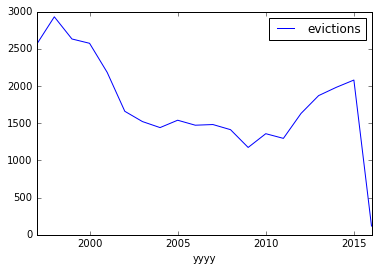

In [121]:
evictions_by_year.plot()

In [122]:
from pandas.io.data import DataReader
import datetime

In [129]:
nasdaq = DataReader("NASDAQ:NDAQ", "google", start=datetime.datetime(1990, 1, 1))

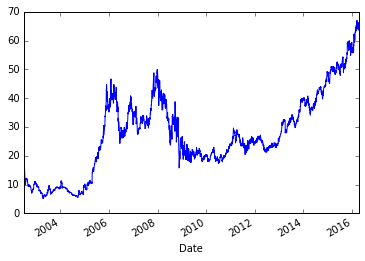

In [130]:
nasdaq['Close'].plot()

In [133]:
nasdaq_year_avg = nasdaq['Close'].groupby(pd.TimeGrouper('A')).mean()
nasdaq_year_avg

Date
2002-12-31    10.210551
2003-12-31     7.857143
2004-12-31     7.602937
2005-12-31    20.719563
2006-12-31    34.533665
2007-12-31    35.081155
2008-12-31    33.118656
2009-12-31    20.541111
2010-12-31    20.073147
2011-12-31    25.120675
2012-12-31    24.030560
2013-12-31    32.328532
2014-12-31    40.442262
2015-12-31    51.973849
2016-12-31    62.081324
Freq: A-DEC, Name: Close, dtype: float64

In [139]:
nasdaq_year_avg.index = evictions_by_year.loc[2002:].index

In [140]:
evictions_by_year['nasdaq'] = nasdaq_year_avg

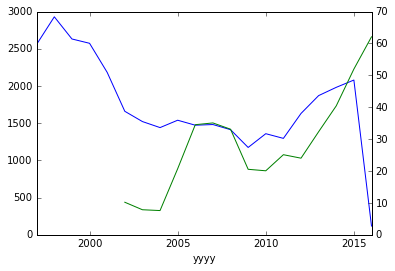

In [147]:
evictions_by_year['evictions'].plot()
evictions_by_year['nasdaq'].plot(secondary_y=True)